# Ejercicio 3

## Resolución

In [37]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from interpolation import newton
from interpolation.error import general_error_bound

### Los datos del problema

In [38]:
X = [0.6, 0.7, 0.8, 0.9, 1.0]
Y = [1.433329, 1.632316, 1.896481, 2.247908, 2.718282]

# La función expresada como lambda
f = lambda x : np.exp(np.power(x, 2))

# La función expresada simbólicamente
x_sym = sp.symbols('x')
f_sym = sp.exp(sp.Pow(x_sym, 2))
f_sym

exp(x**2)

### Punto a

Usamos nuestra función `newton(X, Y)` para calcular el polinomio interpolador con el método de Newton.

In [39]:
P, N = newton(X, Y)
print("La tabla de diferencias divididas resultante es:")
print(N.transpose())
print("El polinomio interpolador resultante es:")
print(P)

La tabla de diferencias divididas resultante es:
[[1.433329   1.98987    3.2589     3.68066667 4.00041667]
 [1.632316   2.64165    4.3631     5.28083333 0.        ]
 [1.896481   3.51427    5.94735    0.         0.        ]
 [2.247908   4.70374    0.         0.         0.        ]
 [2.718282   0.         0.         0.         0.        ]]
El polinomio interpolador resultante es:
1.581167 - 3.47361417·x + 8.93089583·x² - 8.32058333·x³ + 4.00041667·x⁴


### Punto b

Aproximamos los valores de 0.82 y 0.98 usando nuestro polinomio interpolador.

In [40]:
print(f"P(0.82) = {P(0.82):.6f}")
print(f"P(0.98) = {P(0.98):.6f}")

P(0.82) = 1.958910
P(0.98) = 2.612848


### Punto c

Utilizemos nuestra función `general_error_bound()` para encontrar una cota del error en 0.82 y 0.98. Para luego, compararlos con el error real.

In [41]:
xs = [0.82, 0.98]
bounds = general_error_bound(f_sym, X, xs)
for i in range(len(xs)):
    err = abs(f(xs[i]) - P(xs[i]))
    print(f"\nLa cota de error obtenida para {xs[i]} es {bounds[i]:.6f}, mientras que el error real es {err:.6f}")
    if err <= bounds[i]:
        print("Como era esperable, confirmamos que el error real es menor o igual que la cota.")


La cota de error obtenida para 0.82 es 0.000054, mientras que el error real es 0.000023
Como era esperable, confirmamos que el error real es menor o igual que la cota.

La cota de error obtenida para 0.98 es 0.000217, mientras que el error real es 0.000107
Como era esperable, confirmamos que el error real es menor o igual que la cota.


### Punto d

Grafiquemos el error real de la interpolación en $[0.5, 1]$ y $[0, 2]$

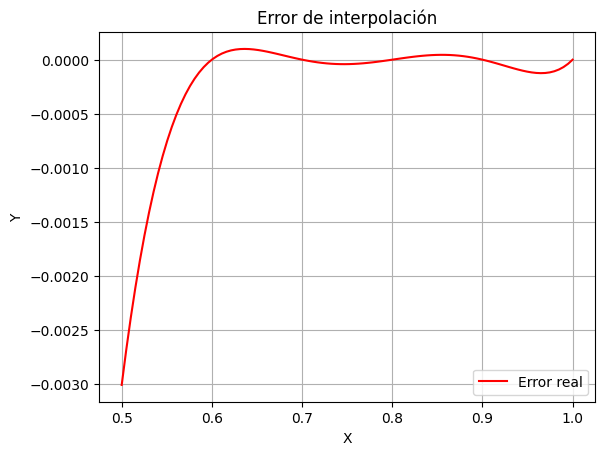

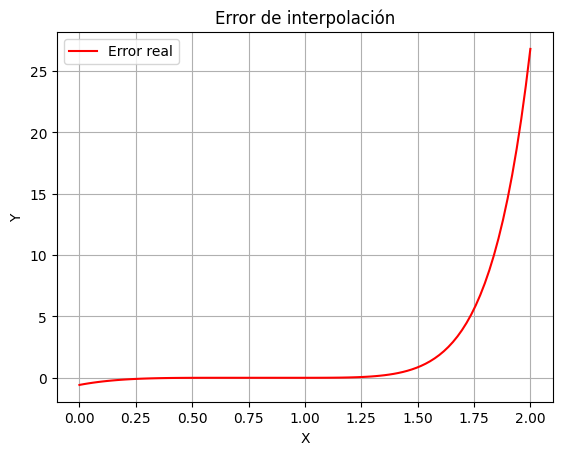

In [42]:
def grafica_error(a, b):
    I = np.linspace(a, b, 100)
    E = f(I) - P(I)
    plt.plot(I, E, color='red', linestyle='-', label='Error real')
    #plt.scatter(x, y, color='blue', marker='o', label='Puntos')
    plt.title("Error de interpolación")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

grafica_error(0.5, 1)
grafica_error(0, 2)

## Conclusiones

- En este ejercicio, usamos el método de Newton para encontrar el polinomio de interpolación de la función $e^{x^2}$ usando 5 puntos.
- Con dicho polinomio aproximamos los valores de 0.82 y 0.98, y calculamos el error de la aproximación. Dicho error resultó ser pequeño $(<10^{-3})$ para ambos casos.
- Luego, usamos la fórmula de la cota del error en los dos puntos. Encontramos que el error real es menor que la cota, tal como se describe en la teoría.
- Finalmente, graficamos el error real en $[0.5, 1]$ y $[0, 2]$. En el primer intervalo, observamos que el error es pequeño dentro del intervalo de interpolación $[0.6, 1]$. Sin embargo, empieza a crecer a medida que se acerca a 0.5. En el segundo intervalo, vemos este fenómeno con más claridad a medida que nos acercamos a 2.
- Con esto concluimos que los polinomios de interpolación aproximan muy bien la función dentro del intervalo de interpolación. Sin embargo, a medida que nos salimos de este intervalo el error aumenta.